<div>
<img src="https://csdms.colorado.edu/csdms_wiki/images/ESPIn-mtns-skinny-transparent.png" width="800"/>
</div>

<div>
<img src="https://csdms.colorado.edu/csdms_wiki/images/thumb/CSDMS-logo-color-notagline-ver_high.png/400px-CSDMS-logo-color-notagline-ver_high.png" width="200" hspace="20"><a href="http://landlab.github.io"><img src="https://raw.githubusercontent.com/landlab/tutorials/release/landlab_header.png" width="500"></a>
</div>

# Post-Glacial Landscape Lab: Exploring the Dynamic Environments of Glacial Retreat 
### Overview
This lab will introduce some of the key drivers of landscape change following deglaciation. The lab will also develop familiarity with modeling 2D systems via the Landlab modeling ecosystem, including setting up gridded topography with subsurface ice (RasterModelGrid), and employing physics-based landscape modification components (LinearDiffuser, OverlandFlow, LinearDiffusionOverlandFlowRouter, KinwaveImplicitOverlandFlow, FlowDirectorSteepest, SedDepEroder, NetworkSedimentTransporter). The final componant of the lab will be to simulate flow over real topography, obtained using Landlab Data Components.

### Time: 1-2 hrs

### Learning objectives
#### Skills
Running 2D numerical models to simulate short term landscape evolution applicable to rapidly warming Arctic and alpine Environments.

#### Key concepts

* Paraglacial processes
* Landlab
* CSDMS Data Component

### Requirements
If you don't already have a JupyterHub account, follow the instructions to sign up at https://csdms.colorado.edu/wiki/JupyterHub. If you're an educator, you can get JupyterHub accounts for students--please contact us through the CSDMS Help Desk: https://csdms.github.io/help-desk.
If run locally, please Please first download all the files from this repository and have conda installed on the local PC. Then, use the following commands to create a virtual environment and launch the Jupyter Notebook.

    $ cd 2025-postglacial-landscapes
    $ conda env create --file=environment.yml
    $ conda activate 2025-postglacial-landscapes
    $ jupyter notebook


### Contributors 
* Viet M Bui (organic rice fed - Delta & SLR dude)
* Ari Koeppel (sol3ling)
* Shayla Triantafillou (river gal)
* Karin Lehnigk (glof club)
* Lucille Baker-Stahl (temperature + morphodynamics = ?)
* Tom Hoseason (tbd)

This lab was developed as part of the 2025 Earth Surface Processeses Institute (ESPIn) with support from the National Science Foundation under collaborative grants 1831623, 2026951, 2140831, 2104102, and 2148762.

# Table of Contents
* [Introduction](#Introduction)
* [Setting up a Moraine Diffusion Model](#setting-up-a-moraine-diffusion-model)
* [Setting up an Overland Flow Model](#setting-up-an-overland-flow-model)
* [Sediment Transport](#sediment-transport-coupling-diffusion-and-flow)
* [Vegetation and Erodibility](#vegetation-and-erodibility)
* [Combining the Elements](#combining-the-elements-into-a-scaled-model)
* [Summary and implications for our warming Arctic and alpine](#Summary)


## Introduction

Studying the dynamics of ice-cored moraines is essential for understanding how postglacial landscapes evolve. These landforms trap and slowly release glacial ice beneath a cover of sediment, which affects rates of meltwater production and sediment transport. As ice cores degrade, they can generate localized subsidence, alter drainage patterns, and increase sediment input into downstream channels. By measuring changes in surface morphology, ice volume, and melt rates, researchers can quantify sediment budgets and model the long-term development of glacial forefields, improving predictions of landscape adjustment following glacier retreat. 

Beyond landscape evolution, ice-cored moraine dynamics pose direct implications for hazard assessment and water resources. Rapid collapse of moraine ridges or sudden outbursts of trapped meltwater may trigger debris flows, floods, and infrastructure damage in downstream communities. Conversely, the slow release of water from buried ice contributes to seasonal streamflow, particularly in regions dependent on glacial melt for irrigation and hydropower. Detailed monitoring and numerical modeling of ice-cored moraines thus support both risk mitigation—through early warning of potential slope failures—and resource management under changing climate conditions. 

## Setting up a Moraine Diffusion Model

## Setting up an Overland Flow Model

Newly exposed surfaces in proglacial basins often experience overland flow as well-defined channels have yet to form.

## Sediment Transport: Coupling Diffusion and Flow

## Vegetation and Erodibility

## Combining the Elements into a Scaled Model

Text(0.5, 1.0, 'Final Topography')

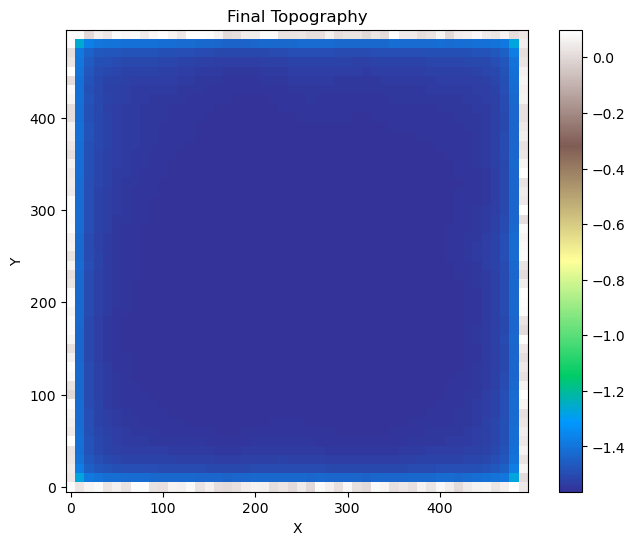

In [ ]:
from landlab.components import LinearDiffuser, OverlandFlow, FlowDirectorSteepest, FlowAccumulator, SedDepEroder
import numpy as np
import matplotlib.pyplot as plt
from landlab import RasterModelGrid

# Create a grid
grid = RasterModelGrid((50, 50), xy_spacing=10.0)
z = grid.add_zeros('topographic__elevation', at='node')
z += np.random.rand(len(z)) * 0.1  # Add some random noise to the elevation

# Add subsurface ice
ice = grid.add_zeros('ice__thickness', at='node')
ice[grid.core_nodes] = np.random.rand(len(grid.core_nodes)) * 2.0  # Random ice thickness

swd = grid.add_zeros('surface_water__depth', at='node')
swd[grid.core_nodes] = np.random.rand(len(grid.core_nodes)) * 0.1  # Initial surface water depth

# Initialize components
diffuser = LinearDiffuser(grid, linear_diffusivity=0.01)
overland_flow = OverlandFlow(grid)
flow_director = FlowDirectorSteepest(grid)
flow_accumulator = FlowAccumulator(grid)
sed_dep_eroder = SedDepEroder(grid, K_sp=0.01, m_sp=0.5, n_sp=1.0)

# Time loop
for t in range(100):  # Simulate 100 time steps
    # Simulate overland flow
    overland_flow.run_one_step()
    
    # Direct and accumulate flow
    flow_director.run_one_step()
    flow_accumulator.run_one_step()
    
    # Erode and deposit sediment
    sed_dep_eroder.run_one_step(dt=1.0)
    
    # Diffuse the landscape
    diffuser.run_one_step(dt=1.0)
    
    # Melt ice and adjust topography
    melt_rate = 0.01  # Example melt rate
    ice_melt = np.minimum(ice[grid.core_nodes], melt_rate)
    ice[grid.core_nodes] -= ice_melt
    z[grid.core_nodes] -= ice_melt

# Plot the final topography
plt.figure(figsize=(8, 6))
grid.imshow('topographic__elevation', cmap='terrain')
plt.title('Final Topography')
# plt.colorbar(label='Elevation (m)')
# plt.show()

## Summary

This document forms a simple basis, or starting point, for upscaling these results to a natural system in an arctic or alpine deglaciated valley.

### References

    Brook, M. S., & Paine, S. (2012). Ablation of ice‐cored moraine in a humid, maritime climate: Fox Glacier, New Zealand. Geografiska Annaler: Series A, Physical Geography, 94(3), 339-349.

    Nicholson, L., & Benn, D. I. (2006). Calculating ice melt beneath a debris layer using meteorological data. Journal of Glaciology, 52(178), 463-470. https://doi.org/10.3189/172756506781828584

    Østrem, G. (1959). Ice melting under a thin layer of moraine, and the existence of ice cores in moraine ridges. Geografiska Annaler, 41(4), 228-230. https://www.jstor.org/stable/4626805

    Richardson, S. D., & Reynolds, J. M. (2000). Degradation of ice-cored moraine dams: implications for hazard development. IAHS PUBLICATION, 187-198.

    Schomacker, A., & Kjær, K. H. (2008). Quantification of dead‐ice melting in ice‐cored moraines at the high‐Arctic glacier Holmströmbreen, Svalbard. Boreas, 37(2), 211-225.

    Sletten, K., Lyså, A., & Lønne, I. (2001). Formation and disintegration of a high‐arctic ice‐cored moraine complex, Scott Turnerbreen, Svalbard. Boreas, 30(4), 272-284.https://doi.org/10.1111/j.1502-3885.2001.tb01046.x

    Westoby, M. J., Glasser, N. F., Brasington, J., Hambrey, M. J., Quincey, D. J., & Reynolds, J. M. (2014). Modelling outburst floods from moraine-dammed glacial lakes. Earth-Science Reviews, 134, 137-159. https://doi.org/10.1016/j.earscirev.2014.03.009